In [1]:
# % matplotlib inline
import torch 
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR, MultiStepLR
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

torch.set_default_tensor_type('torch.FloatTensor')

# import importlib
# drmpoisson = importlib.import_module("drm-poisson") 
from drm_poisson import DeepRitzNet

In [2]:
model = DeepRitzNet(2)
model.load_state_dict(torch.load('./model_dict.pt'))
model.eval()

DeepRitzNet(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (linear2): Linear(in_features=2, out_features=2, bias=True)
  (linear3): Linear(in_features=2, out_features=2, bias=True)
  (linear4): Linear(in_features=2, out_features=2, bias=True)
  (linear5): Linear(in_features=2, out_features=2, bias=True)
  (linear6): Linear(in_features=2, out_features=2, bias=True)
  (linear7): Linear(in_features=2, out_features=1, bias=True)
)

In [3]:
N = 200
Nx = N
Ny = N*2
x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Ny)
X, Y = np.meshgrid(x,y)

XY = np.stack((X.ravel(), Y.ravel()),1)

In [4]:
u = (model(torch.FloatTensor(XY)))
u = u.detach().numpy()
u = np.reshape(u, (Ny,Nx))

u_exact = X*Y

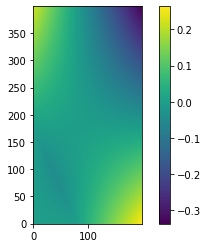

In [5]:
plt.imshow(u-u_exact, origin='lower')
plt.colorbar()